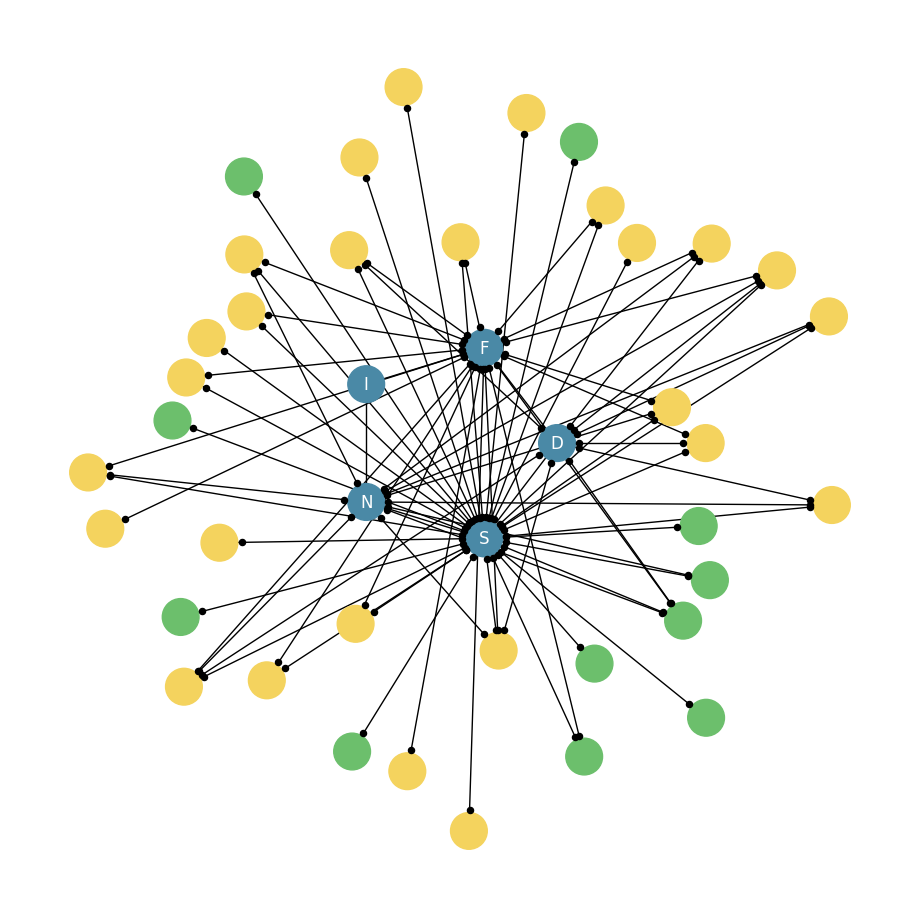

In [124]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Load CSV
file_path = "datasets/networks_assignment.csv"
df = pd.read_csv(file_path)

# Set 'LABELS' as index so we can access rows properly
df.set_index('LABELS', inplace=True)

# Extract nodes
externalNodes = df.columns.to_numpy()  # Column names (Nodes)
interiorNodes = df.index.to_numpy()    # Row names (Nodes)

# Create a Graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(interiorNodes)
G.add_nodes_from(externalNodes)

# Add edges between interior and external nodes
for row in interiorNodes:
    for col in externalNodes:
        if df.at[row, col] != 0:  # If there is an edge
            G.add_edge(row, col, weight=df.at[row, col])  # Add edge with weight

interiorNodeCount = len(interiorNodes)
for nodeIndex in range(interiorNodeCount):
    G.add_edge(interiorNodes[nodeIndex], interiorNodes[(nodeIndex + 1) % interiorNodeCount])

node_colors = []
for node in G.nodes():
    if node in interiorNodes:  # Specific nodes to be red
        node_colors.append("#4A89A6")
    elif node in ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']:
        node_colors.append("#6CBF6C")
    else:
        node_colors.append("#F4D35E")

theta = np.linspace(0, 2 * np.pi, 5, endpoint=False)  # 5 evenly spaced points
pentagram_positions = {node: (np.cos(t), np.sin(t)) for node, t in zip(interiorNodes, theta)}

# outer_theta = np.random.uniform(0, 2 * np.pi, len(externalNodes))  # Random angles
# radius = 2.0  # Larger radius for outer nodes
# outer_positions = {node: (radius * np.cos(t), radius * np.sin(t)) for node, t in zip(externalNodes, outer_theta)}

externalNodeCount = len(externalNodes)

# outer_theta = np.random.uniform(0, 2 * np.pi, externalNodeCount)  # Random angles
outer_theta = np.linspace(0, 2 * np.pi, externalNodeCount, endpoint=False)
#radius = random.choices(range(2, 5), k=externalNodeCount)
radius = random.sample(list(np.linspace(2, 4, 1000)), externalNodeCount)  # 1000 ensures better uniqueness
outer_positions = {node: (radiusVar * np.cos(t), radiusVar * np.sin(t)) for node, radiusVar, t in zip(externalNodes, radius, outer_theta)}

pos = {**pentagram_positions, **outer_positions}

labels = {node: node for node in interiorNodes}  # Only label interior nodes

# Draw the Graph
nodeSize = 700
plt.figure(figsize=(9, 9))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=nodeSize, node_color=node_colors, edge_color="black", font_color="white")

for edge in G.edges():
    if edge[0] in externalNodes or edge[1] in externalNodes:
        node1, node2 = edge
        x1, y1 = pos[node1]
        x2, y2 = pos[node2]
    
        # Compute unit vector along the edge direction
        dx, dy = x2 - x1, y2 - y1
        distance = np.sqrt(dx**2 + dy**2)
        unit_dx, unit_dy = dx / distance, dy / distance
    
        # Offset distance from node center
        offset = 0.21  # Adjust this based on node size
    
        # Compute new positions for circular endpoints
        circle1_x, circle1_y = x1 + offset * unit_dx , y1 + offset * unit_dy
        circle2_x, circle2_y = x2 - offset * unit_dx , y2 - offset * unit_dy
    
        # Draw the circles
        plt.scatter([circle1_x, circle2_x], [circle1_y, circle2_y], color="black", s=19.3, zorder=3)

plt.show()
